# Introduction to Programming Artificial Intelligence 

## Class 10 - Classification

### Exercise 1
Load the following dataset: `https://archive.ics.uci.edu/ml/machine-learningdatabases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv` into a Pandas’ DataFrame. Use the following column names:

In [1]:
import pandas as pd
columns = ["Age",
           "Gender",
           "TB Total Bilirubin",
           "DB Direct Bilirubin",
           "Alkphos Alkaline Phosphotase",
           "Sgpt Alamine Aminotransferase",
           "Sgot Aspartate Aminotransferase",
           "TP Total Protiens",
           "ALB Albumin",
           "A/G Ratio Albumin / Globulin Ratio",
           "Class"]

data = pd.read_csv(
"https://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv",
header=None,
names=columns)
data

,Age,Gender,TB Total Bilirubin,DB Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,TP Total Protiens,ALB Albumin,A/G Ratio Albumin / Globulin Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [2]:
data['Class'].groupby(data['Class']).count()

Class
1    416
2    167
Name: Class, dtype: int64

### Exercise 2
Build a `DecisionTreeClassifier` using the DataFrame above. You might need to investigate whether to apply any pre-processing step or not. Remember that the ‘Class’ attributes should not be used as a predictor attribute

#### Preprocessing Data

In [3]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

values = enc.fit_transform(data.loc[:,["Gender"]])
enc.categories_

data['Female']=values[:,0]
data['Male']=values[:,1]

data = data.drop(data[data["A/G Ratio Albumin / Globulin Ratio"].isna()].index)
data = data.drop(columns = ["Gender"])

X = data.drop(columns = ["Class"])
Y = data.loc[:,"Class"]

#### Decision Tree Model

In [4]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X,Y)

DecisionTreeClassifier()

#### Evaluation

In [5]:
tree.score(X,Y)

1.0

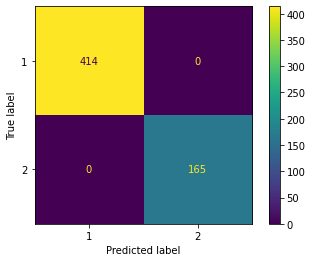

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = tree.predict(X)
cm = confusion_matrix(Y, predictions, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
# displays the matrix
_ = disp.plot()

### Exercise 3 
As we discussed in the lecture, to reliably evaluate the quality of a classifier we need to divide the data into training and testing. Using the `train_test_split` function, create and evaluate a DecisionTreeClassifier. Repeat the evaluation 10 times using different `random_state` values and calculate the average performance. 

In [7]:
from sklearn.model_selection import train_test_split
scores = 0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = i)
    
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    
    scores+= tree.score(X_test, y_test)
    
print(scores/10)

0.6586206896551723


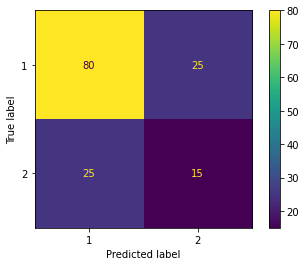

In [8]:
# displays the confusion matrix
predictions = tree.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree.classes_)
_ = disp.plot()

### Exercise 4
We can use the same data to model a different classification problem. For example, try to predict the ‘Gender’ based on the different set of predictors. Train a classifier to predict the ‘Gender’ value, measuring its performance.

#### Preprocessing Data

In [9]:
from sklearn.model_selection import train_test_split

# prepares the training data
X = data.drop(columns = ["Female","Male"])
Y = data.loc[:,"Female":"Male"]

#### Describing and evulating decision tree model

In [10]:
from sklearn.model_selection import train_test_split

treeScores = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = i)
    
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    
    treeScores+= tree.score(X_test, y_test)
    
print(treeScores/10)

0.7041379310344827


### Exercise 5
Repeat Task 3, this time using a RandomForestClassifier. Compare the results obtained by the RandomForest against the DecisionTree.

#### Describing and evulating random forest model

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

forestScores = 0
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = i)
    
    forest = RandomForestClassifier()
    forest.fit(X_train, y_train)
    
    forestScores+= forest.score(X_test, y_test)
    
print(forestScores/10)

0.7641379310344828


#### Comparing DecisionTree against RandomForest

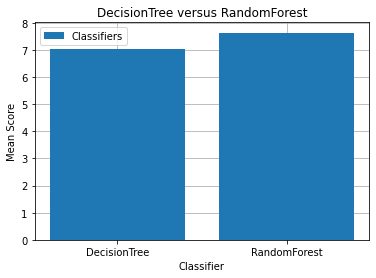

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

#[GA code is here but deleted for simplicity]

x = ["DecisionTree", "RandomForest"]
y = [treeScores, forestScores]

plt.bar(x,y,label="Classifiers", zorder=3)

# set labels and plot
plt.xlabel ("Classifier")
plt.ylabel ("Mean Score")
plt.title ("DecisionTree versus RandomForest")
plt.grid()
plt.legend()
plt.show()